In [1]:
import numpy as np
import pandas as pd 
import os.path
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm, metrics
from sklearn.calibration import calibration_curve, CalibrationDisplay
# from sklearn.calibration import calibration_curve
import  sklearn.calibration

import matplotlib.pyplot as plt
import tensorflow_probability as tfp

from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold

In [2]:
# import sklearn
# sklearn.__version__
# sklearn.show_versions()

In [3]:
import recourse as rs
import shap
import lime

In [4]:
# import tensorflow as tf
# tensorflow.__version__

# Screening Dataset Logistic Regression

In [5]:
data_path = os.path.join("..","src","data", "screening", "screening_data.csv")
data = pd.read_csv(data_path)
training_variables = ['satisfactoryCreditHistory',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban']


In [6]:
X = data[training_variables]
y = data["outcome"]

In [7]:
def classify(model,x,y):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.25, random_state=47)
    model.fit(X_train, y_train)
    print('Model',model)
    print("Accuracy is", model.score(X_test, y_test)* 100)
    # cross  validation for better validation
    kfold = model_selection.KFold(n_splits=10,random_state=42, shuffle=True)
    score = model_selection.cross_val_score(model, x, y, cv=kfold)
    print("Cross Val", np.mean(score)*100)
#     ROC curve + AUC
    train_roc = metrics.plot_roc_curve(model, X_train, y_train)
    test_roc = metrics.plot_roc_curve(model, X_test, y_test) 
    plt.show()
# Reliability diagram train
    y_prob = model.predict_proba(X_train)[:, 1]
#     tf.convert_to_tensor(y_pred, dtype = tf.int64)
    prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=10)
    disp = sklearn.calibration.CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp = sklearn.calibration.CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()
    
#     y_train_tensor = tf.convert_to_ten
#     y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
#     y_prob_tensor = tf.convert_to_tensor(y_prob, dtype=tf.float32)
#     y_pred_proba = clf.predict_proba(X_train)
#     logit_tensor = tf.convert_to_tensor(y_pred_proba, dtype = tf.float32, name = 'logits')
#     print(tfp.expected_calibration_error(num_bins=15, logits = logit_tensor, labels_true=y_train_tensor, labels_predicted=y_prob_tensor))
    
# reliability diagram Test
    y_prob = model.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
    disp.plot()
#     print(tfp.python.stats.expected_calibration_error(num_bins=15, labels_true=y_test, labels_predicted=y_prob))


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Model LogisticRegression()
Accuracy is 56.09756097560976
Cross Val 60.851370851370845


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


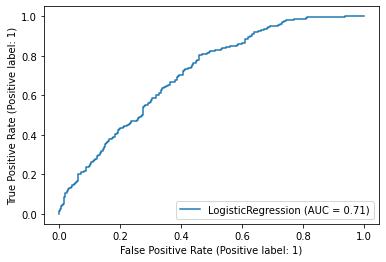

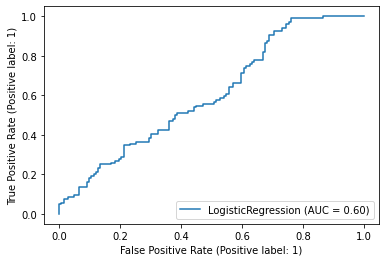

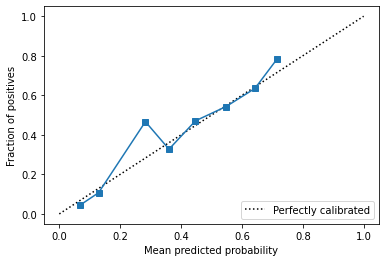

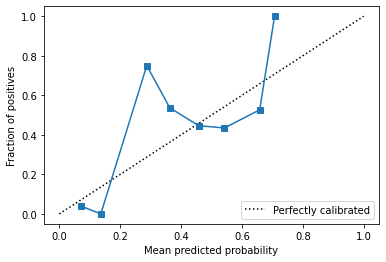

In [8]:
classify(LogisticRegression(), X, y)

# Logistic Regression - Different Approach

In [9]:
# training
data_path = os.path.join("..", "src", "data", "screening", "raw", "Train Dataset.csv")
df1 = pd.read_csv(data_path)
# missing values
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
# drop loan ID
df1 = df1.drop(columns=['Loan_ID'])

In [10]:
# testing
data_path = os.path.join("..", "src", "data", "screening", "raw", "Test Dataset.csv")
data_samp = os.path.join("..", "src", "data", "screening", "raw", "Sample_Submission.csv")
df2 = pd.read_csv(data_path)
df3 = pd.read_csv(data_samp)

df2 = pd.DataFrame.merge(df2, df3, on = "Loan_ID")

# missing values
df2['Gender']=df2['Gender'].fillna(df2['Gender'].mode()[0])
df2['Dependents']=df2['Dependents'].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed']=df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['LoanAmount']=df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term']=df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History']=df2['Credit_History'].fillna(df2['Credit_History'].mean())
# drop loan ID
df2=df2.drop(columns=['Loan_ID']) 

In [11]:
data=pd.concat([df1,df2],axis=0) 

In [12]:
data_path = os.path.join("..", "src", "data", "screening", "screening_data.csv")
data = pd.read_csv(data_path)
data.head()

,loanID,applicantIncome,coapplicantIncome,loanAmount,loanAmountTerm,...,hasNotGraduated,isSelfEmployed,livesSemiurbal,livesUrban,outcome
0,LP001002,5849,0.0,142.51153,360.0,...,0,0,0,1,1
1,LP001003,4583,1508.0,128.00000,360.0,...,0,0,0,0,0
2,LP001005,3000,0.0,66.00000,360.0,...,0,1,0,1,1
3,LP001006,2583,2358.0,120.00000,360.0,...,1,0,0,1,1
4,LP001008,6000,0.0,141.00000,360.0,...,0,0,0,1,1


In [13]:
class ChiSquare:
    def __init__(self, dataframe):
        self.data = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.data[colX].astype(str)
        Y = self.data[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [78]:
# Initialize ChiSquare Class
cT = ChiSquare(data)

#Feature Selection
testColumns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
data_cols = ['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
       'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMale', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban']
      
       
for var in data_cols:
    cT.TestIndependence(colX=var,colY="outcome" )

loanID is NOT an important predictor. (Discard loanID from model)
applicantIncome is NOT an important predictor. (Discard applicantIncome from model)
coapplicantIncome is NOT an important predictor. (Discard coapplicantIncome from model)
loanAmount is NOT an important predictor. (Discard loanAmount from model)
loanAmountTerm is NOT an important predictor. (Discard loanAmountTerm from model)
satisfactoryCreditHistory is IMPORTANT for Prediction
totalIncome is NOT an important predictor. (Discard totalIncome from model)
applicantIncomeLog is NOT an important predictor. (Discard applicantIncomeLog from model)
coapplicantIncomeLog is NOT an important predictor. (Discard coapplicantIncomeLog from model)
loanAmountLog is NOT an important predictor. (Discard loanAmountLog from model)
loanAmountTermLog is NOT an important predictor. (Discard loanAmountTermLog from model)
totalIncomeLog is NOT an important predictor. (Discard totalIncomeLog from model)
isMale is NOT an important predictor. (Dis

In [15]:
# categorical_features = ['Gender', 'Married', 'Dependents',
#  'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [16]:
# data.drop(columns=['gender', 'married', 'education','applicantIncome', 'coapplicantIncome', 'loanAmount'],inplace = True)

#Encoding Categorical Variables

# labelencoder=LabelEncoder()
# for col in data.columns:
#     data[col] = labelencoder.fit_transform(data[col])
    
#Now one hot encoding
# data=pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents','Education',"Loan_Amount_Term",'Self_Employed',"Credit_History","Property_Area"],drop_first=False)
                                   
                                   

In [17]:
X = data[["satisfactoryCreditHistory", "isMarried", "livesSemiurbal", "outcome"]]
# data.columns

In [18]:
# X = data.drop(columns=['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount','loanAmountTerm', 
#                        'totalIncome','isMale','has1Dependent', 'has2Dependents', 'has3+Dependents', 
#                        'hasNotGraduated','isSelfEmployed', 'livesSemiurbal', 'livesUrban'])

In [19]:
data.columns

Index(['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
       'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMale', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban', 'outcome'],
      dtype='object')

## train

In [20]:
#Separating features and label
y=X['outcome']
X=X.drop(['outcome'],axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=47)

kfold = model_selection.StratifiedKFold(n_splits=3,shuffle=True, random_state=42)

Model LogisticRegression()
Accuracy is 62.19512195121951
Cross Val 62.89115646258503


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


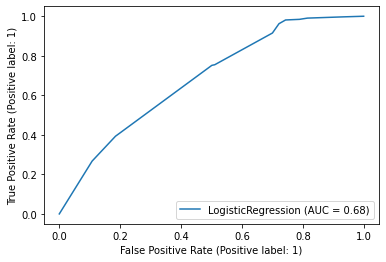

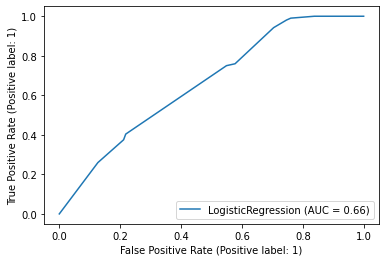

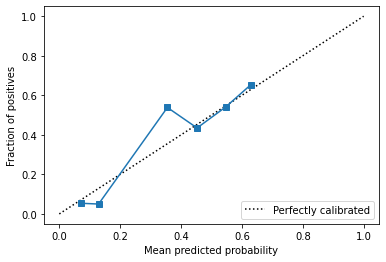

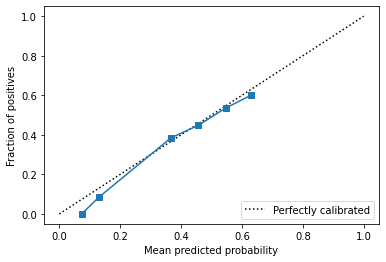

In [21]:
classify(LogisticRegression(), X, y)

In [22]:
rss = 15
clrs = []

# clrs.append(AdaBoostClassifier(random_state=rss))
# clrs.append(GradientBoostingClassifier(random_state=rss))
# clrs.append(RandomForestClassifier(random_state=rss))
clrs.append(LogisticRegression(random_state = rss))
# clrs.append(ExtraTreesClassifier(random_state = rss))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,
                      "Algo":["Logistic Regression"
#                               ,"RandomForestClassifier"
#                               ,"AdaBoostClassifier"
#                               ,"Gradient Boosting"
#                               ,'ExtraTreesClassifier'
                             ]})

In [23]:
# g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std})
# g.set_xlabel("Mean Accuracy")
# g = g.set_title("Cross validation scores")
# print(cv_df)

## SHAP - Screening dataset

In [24]:
data.columns

Index(['loanID', 'applicantIncome', 'coapplicantIncome', 'loanAmount',
       'loanAmountTerm', 'satisfactoryCreditHistory', 'totalIncome',
       'applicantIncomeLog', 'coapplicantIncomeLog', 'loanAmountLog',
       'loanAmountTermLog', 'totalIncomeLog', 'isMale', 'isMarried',
       'has1Dependent', 'has2Dependents', 'has3+Dependents', 'hasNotGraduated',
       'isSelfEmployed', 'livesSemiurbal', 'livesUrban', 'outcome'],
      dtype='object')

In [25]:
col_names = ['satisfactoryCreditHistory','loanAmountLog','loanAmountTermLog', 'totalIncomeLog', 
          'isMarried','has1Dependent', 'has2Dependents', 'has3+Dependents', 
          'hasNotGraduated','isSelfEmployed', 'livesSemiurbal', 'livesUrban']
mutable_col_names = ['satisfactoryCreditHistory', 'loanAmountTermLog', 'totalIncomeLog']
continuous_col_names = ['loanAmountLog','loanAmountTermLog', 'totalIncomeLog']
X = data[col_names]

# classify(LogisticRegression(), X, y)

In [86]:
len(X)

981

In [26]:
model = LogisticRegression()
model.fit(X, y)


# build an Exact explainer and explain the model predictions on the given dataset
explainer = shap.explainers.Exact(model.predict_proba, X)
shap_values = explainer(X)

# get just the explanations for the positive class
shap_values = shap_values[...,1]
# shap.plots.bar(shap_values)

Exact explainer: 982it [00:28, 24.06it/s]                                       


In [27]:
shap.initjs()
shap.plots.force(shap_values)

In [28]:
model.predict(X)[:11]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [29]:
# Loan Rejected (predict)
shap.plots.force(shap_values[0])

In [30]:
# Loan Accepted (predict)
shap.plots.force(shap_values[2])

In [31]:
sum(pd.DataFrame(shap_values.values).iloc[0]) + 0.40661122

0.41729952913984386

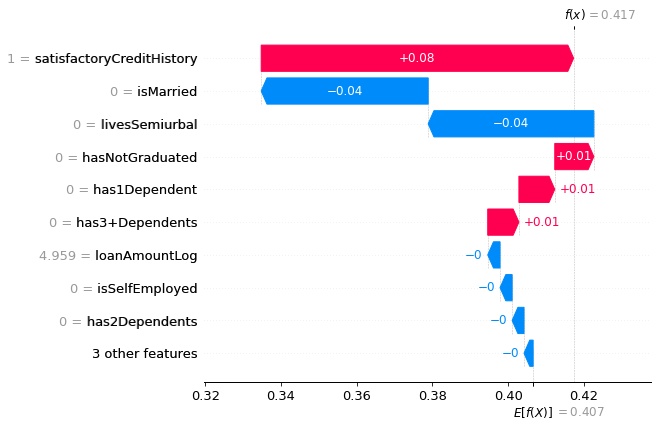

In [32]:
shap.plots.waterfall(shap_values[0])

In [33]:
shap_values_df = pd.DataFrame(shap_values.values)
shap_values_df.columns = col_names
shap_values_id = pd.concat([data["loanID"], shap_values_df], axis = 1)
shap_values_id["baseValue"] = shap_values.base_values

In [34]:
shap_values_id
# df["col1"] + df["col2"]
col_names
mutable_col_names
continuous_col_names

['loanAmountLog', 'loanAmountTermLog', 'totalIncomeLog']

In [35]:
post_action = pd.Series([0]*len(shap_values_id))
for i in col_names:
    if i in mutable_col_names:
        if i in continuous_col_names:
            post_action += abs(shap_values_id[i])
        else:
            post_action += [1]*len(shap_values_id)
    else:
        post_action += shap_values_id[i]
shap_values_id["postAction"] = post_action

In [36]:
shap_values_id.loc[shap_values_id["postAction"] <0.5]

,loanID,satisfactoryCreditHistory,loanAmountLog,loanAmountTermLog,totalIncomeLog,...,isSelfEmployed,livesSemiurbal,livesUrban,baseValue,postAction


## SHAP function 
#### Output rows of individuals with no recourse
dataset must have col loanID and outcome (y) 

In [37]:
def shap_recourse(data, model, col_names, mutable_col_names, continuous_col_names):
    X = data[col_names]
    y = data["outcome"]
    
    model = model
    model.fit(X, y)
    
    # build an Exact explainer and explain the model predictions on the given dataset
    explainer = shap.explainers.Exact(model.predict_proba, X)
    shap_values = explainer(X)

    # get just the explanations for the positive class
    shap_values = shap_values[...,1]
    
    # make a dataframe to organize everything
    shap_values_df = pd.DataFrame(shap_values.values)
    shap_values_df.columns = col_names
    shap_values_id = pd.concat([data["loanID"], shap_values_df], axis = 1)
    shap_values_id["baseValue"] = shap_values.base_values
    
    # create new value post_action of theoretical action to be taken
    post_action = pd.Series([0]*len(shap_values_id))
    for i in col_names:
        if i in mutable_col_names:
            if i in continuous_col_names:
                post_action += abs(shap_values_id[i])
            else:
                post_action += [1]*len(shap_values_id)
        else:
            post_action += shap_values_id[i]
    shap_values_id["postAction"] = post_action
    return shap_values_id.loc[shap_values_id["postAction"] <0.5]

In [38]:
# Screening Dataset
col_names = ['satisfactoryCreditHistory','loanAmountLog','loanAmountTermLog', 'totalIncomeLog', 
          'isMarried','has1Dependent', 'has2Dependents', 'has3+Dependents', 
          'hasNotGraduated','isSelfEmployed', 'livesSemiurbal', 'livesUrban']
mutable_col_names = ['satisfactoryCreditHistory', 'loanAmountTermLog', 'totalIncomeLog']
continuous_col_names = ['loanAmountLog','loanAmountTermLog', 'totalIncomeLog']

print(shap_recourse(data, LogisticRegression(), col_names, mutable_col_names, continuous_col_names))

Exact explainer: 982it [00:26, 22.89it/s]                                       

Empty DataFrame
Columns: [loanID, satisfactoryCreditHistory, loanAmountLog, loanAmountTermLog, totalIncomeLog, isMarried, has1Dependent, has2Dependents, has3+Dependents, hasNotGraduated, isSelfEmployed, livesSemiurbal, livesUrban, baseValue, postAction]
Index: []

[0 rows x 15 columns]


In [39]:
# actionable_recourse dataset
url = 'https://raw.githubusercontent.com/ustunb/actionable-recourse/master/examples/paper/data/credit_processed.csv'
df = pd.read_csv(url)
df = df.rename(columns={"NoDefaultNextMonth": "outcome"})
df["loanID"] = df.index

In [72]:
col_names = ['Married', 'Single', 'Age_lt_25', 'Age_in_25_to_40',
       'Age_in_40_to_59', 'Age_geq_60', 'EducationLevel',
       'MaxBillAmountOverLast6Months', 'MaxPaymentAmountOverLast6Months',
       'MonthsWithZeroBalanceOverLast6Months',
       'MonthsWithLowSpendingOverLast6Months',
       'MonthsWithHighSpendingOverLast6Months', 'MostRecentBillAmount',
       'MostRecentPaymentAmount', 'TotalOverdueCounts', 'TotalMonthsOverdue',
       'HistoryOfOverduePayments']
mutable_col_names = ['EducationLevel',
       'MaxBillAmountOverLast6Months', 'MaxPaymentAmountOverLast6Months',
       'MonthsWithZeroBalanceOverLast6Months',
       'MonthsWithLowSpendingOverLast6Months',
       'MonthsWithHighSpendingOverLast6Months', 'MostRecentBillAmount',
       'MostRecentPaymentAmount', 'TotalOverdueCounts', 'TotalMonthsOverdue',
       'HistoryOfOverduePayments']
continuous_col_names = ['EducationLevel',
       'MaxBillAmountOverLast6Months', 'MaxPaymentAmountOverLast6Months',
       'MonthsWithZeroBalanceOverLast6Months',
       'MonthsWithLowSpendingOverLast6Months',
       'MonthsWithHighSpendingOverLast6Months', 'MostRecentBillAmount',
       'MostRecentPaymentAmount', 'TotalOverdueCounts', 'TotalMonthsOverdue',]


In [79]:
cT = ChiSquare(df)
data_cols = ['Married', 'Single', 'Age_lt_25', 'Age_in_25_to_40',
       'Age_in_40_to_59', 'Age_geq_60', 'EducationLevel',
       'MaxBillAmountOverLast6Months', 'MaxPaymentAmountOverLast6Months',
       'MonthsWithZeroBalanceOverLast6Months',
       'MonthsWithLowSpendingOverLast6Months',
       'MonthsWithHighSpendingOverLast6Months', 'MostRecentBillAmount',
       'MostRecentPaymentAmount', 'TotalOverdueCounts', 'TotalMonthsOverdue',
       'HistoryOfOverduePayments']
      
       
for var in data_cols:
    cT.TestIndependence(colX=var,colY="outcome" )

Married is IMPORTANT for Prediction
Single is IMPORTANT for Prediction
Age_lt_25 is IMPORTANT for Prediction
Age_in_25_to_40 is IMPORTANT for Prediction
Age_in_40_to_59 is IMPORTANT for Prediction
Age_geq_60 is IMPORTANT for Prediction
EducationLevel is IMPORTANT for Prediction
MaxBillAmountOverLast6Months is IMPORTANT for Prediction
MaxPaymentAmountOverLast6Months is IMPORTANT for Prediction
MonthsWithZeroBalanceOverLast6Months is IMPORTANT for Prediction
MonthsWithLowSpendingOverLast6Months is IMPORTANT for Prediction
MonthsWithHighSpendingOverLast6Months is IMPORTANT for Prediction
MostRecentBillAmount is IMPORTANT for Prediction
MostRecentPaymentAmount is IMPORTANT for Prediction
TotalOverdueCounts is IMPORTANT for Prediction
TotalMonthsOverdue is IMPORTANT for Prediction
HistoryOfOverduePayments is IMPORTANT for Prediction


In [85]:
shap_recourse(df.head(100), LogisticRegression(), col_names, mutable_col_names, continuous_col_names)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Exact explainer: 101it [01:36,  1.07s/it]                                       


,loanID,Married,Single,Age_lt_25,Age_in_25_to_40,...,TotalOverdueCounts,TotalMonthsOverdue,HistoryOfOverduePayments,baseValue,postAction
